# Read the radiative forcing data
Ref: Köhler et al., 2017, https://doi.org/10.5194/essd-9-363-2017

In [1]:
# read the CH4_stack_156K_spline_V2.tab under /data_fig3 using pandas

import pandas as pd

# read the data
df_ch4 = pd.read_csv('data_fig3/CH4_stack_156K_spline_V2.tab', sep='\t', skiprows=13)
df_ch4


,Age [ka BP],CH4 [nmol/mol],CH4 std dev [±],dR_[CH4] [W/m**2],dR_[CH4] std dev [±]
0,-0.066,1794.11,1.93,0.762,0.228
1,-0.065,1780.47,0.63,0.754,0.227
2,-0.064,1769.75,1.46,0.747,0.226
3,-0.063,1763.26,0.54,0.743,0.226
4,-0.062,1758.52,0.45,0.741,0.225
...,...,...,...,...,...
156273,156.207,393.49,9.59,-0.373,0.111
156274,156.208,393.47,9.60,-0.373,0.111
156275,156.209,393.45,9.62,-0.373,0.111
156276,156.210,393.44,9.64,-0.373,0.111


In [2]:
# read the CO2_stack_156K_spline_V2.tab
import pandas as pd
df_co2 = pd.read_csv('data_fig3/CO2_stack_156K_spline_V2.tab', sep='\t', skiprows=13)
df_co2

,Age [ka BP],CO2 [µmol/mol],CO2 std dev [±],dR_[CO2] [W/m**2],dR_[CO2] std dev [±]
0,-0.066,401.26,0.34,1.963,0.196
1,-0.065,399.62,0.08,1.941,0.194
2,-0.064,397.54,0.09,1.914,0.191
3,-0.063,395.16,0.05,1.881,0.188
4,-0.062,392.77,0.13,1.849,0.185
...,...,...,...,...,...
156368,156.302,189.41,0.46,-2.053,0.206
156369,156.303,189.40,0.46,-2.053,0.206
156370,156.304,189.40,0.46,-2.053,0.206
156371,156.305,189.39,0.46,-2.053,0.206


In [3]:
# read the N2O_stack_134K_spline_V2.tab
import pandas as pd
df_n2o = pd.read_csv('data_fig3/N2O_stack_134K_spline_V2.tab', sep='\t', skiprows=13)
df_n2o

,Age [ka BP],N2O [nmol/mol],N2O std dev [±],dR_[N2O] [W/m**2],dR_[N2O] std dev [±]
0,-0.066,328.54,0.12,0.196,0.028
1,-0.065,327.63,0.11,0.193,0.028
2,-0.064,326.52,0.08,0.189,0.028
3,-0.063,325.61,0.05,0.186,0.027
4,-0.062,324.80,0.13,0.184,0.027
...,...,...,...,...,...
134581,134.515,218.77,3.72,-0.204,0.029
134582,134.516,218.76,3.72,-0.204,0.029
134583,134.517,218.75,3.73,-0.204,0.029
134584,134.518,218.75,3.74,-0.204,0.029


The radiative forcing at 23 kyr is -2.637 W/m**2
[-0.384 -0.266 -0.995 -1.048 -1.102 -1.55  -1.762 -2.448 -2.791 -2.726
 -2.651 -2.762 -2.821 -2.637 -2.869 -2.938 -2.88  -2.689 -2.6   -2.48
 -2.678]


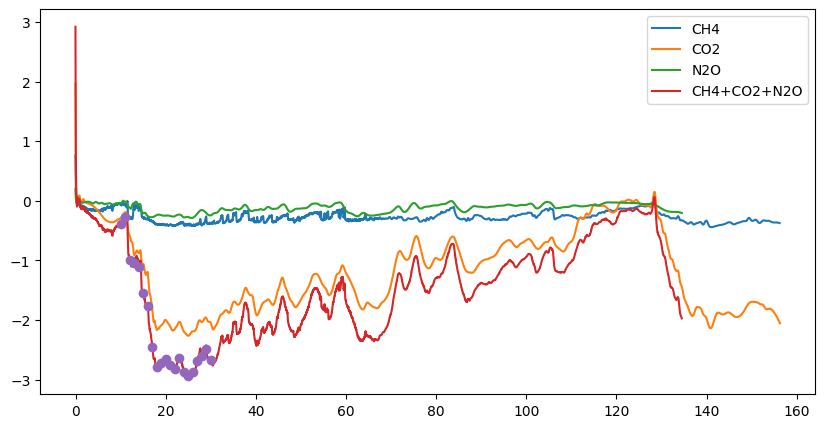

In [15]:
# plot the first and fourth column of the CH4, CO2 and N2O data
import matplotlib.pyplot as plt
import numpy as np

# plot the CH4 data
plt.figure(figsize=(10,5))
plt.plot(df_ch4['Age [ka BP]'], df_ch4['dR_[CH4] [W/m**2]'], label='CH4')
plt.plot(df_co2['Age [ka BP]'], df_co2['dR_[CO2] [W/m**2]'], label='CO2')
plt.plot(df_n2o['Age [ka BP]'], df_n2o['dR_[N2O] [W/m**2]'], label='N2O')

#plot the sum of the three gases
plt.plot(df_n2o['Age [ka BP]'], df_ch4['dR_[CH4] [W/m**2]'][0:134586]+df_co2['dR_[CO2] [W/m**2]'][0:134586]+df_n2o['dR_[N2O] [W/m**2]'], label='CH4+CO2+N2O') 
plt.legend()

# interpolate the sum data at 23 kyr
from scipy.interpolate import interp1d
f = interp1d(df_n2o['Age [ka BP]'], df_ch4['dR_[CH4] [W/m**2]'][0:134586]+df_co2['dR_[CO2] [W/m**2]'][0:134586]+df_n2o['dR_[N2O] [W/m**2]'])
f(23)
# print the value of the sum at 23 kyr
print('The radiative forcing at 23 kyr is', f(23), 'W/m**2')

sampled_F= f(np.linspace(10, 30, 21))
plt.plot(np.linspace(10, 30, 21), sampled_F, 'o')
print(sampled_F)

In [13]:
a=np.linspace(10, 30, 21)
print(a)

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30.]
